# 1. Análise do espectro da frequência de solicitação por transformada rápida de Fourier FFT

## 1.1. Dados de entrada

Toma-se como fonte para esta análise os dados da simulação postada em:
(https://www.linkedin.com/feed/update/urn:li:activity:7225806786316926977/)

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
file = pd.read_excel('data.xlsx') 

In [2]:
t = file['Time']
x = file['avg(U (Magnitude))']

Todas as demais análises são realizadas com os valores numéricos coletados no ponto "probe" em destaque, conforme imagem abaixo:

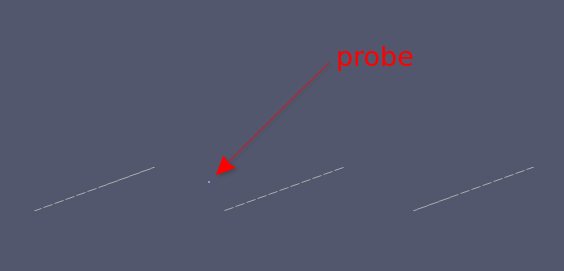

A seguir plota-se o gráfico da velocidade do vento em função do tempo no ponto escolhido.

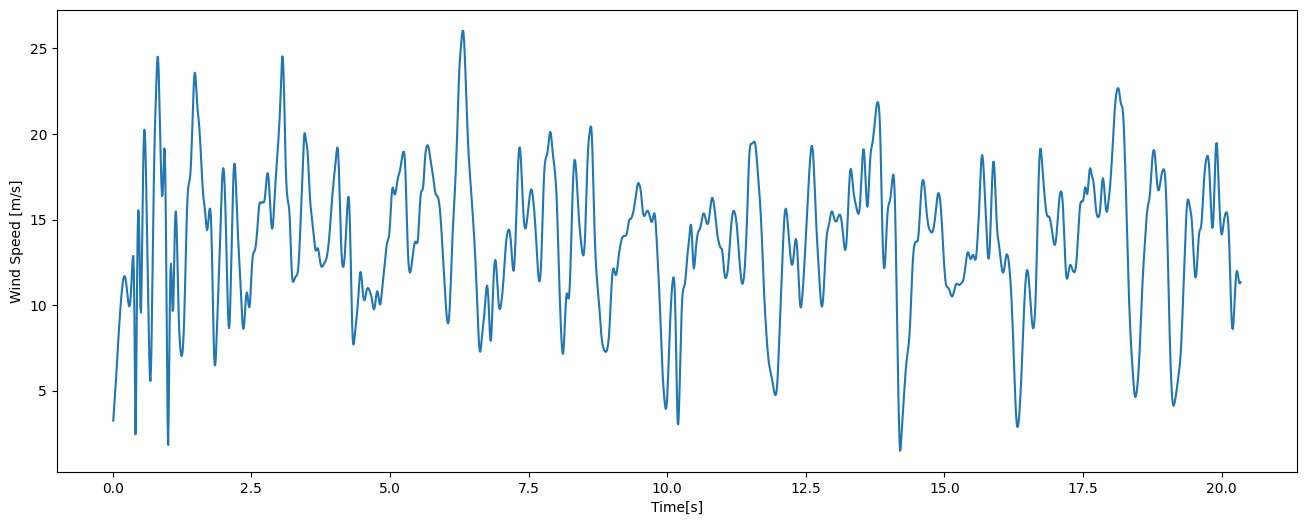

In [3]:
plt.figure(figsize = (16, 6))
plt.xlabel('Time[s]')
plt.ylabel('Wind Speed [m/s]')
plt.plot(t,x)

## 1.2. Análise por transformada rápida de Fourier FFT

Este ítem tem por objetivo segregar as frequências baixas de maior amplitude. Para isto faz-se uso da transformada rápida de Fourier, que leva os dados do dominio do tempo para o domínio da frequência.

(0.0, 2000.0)

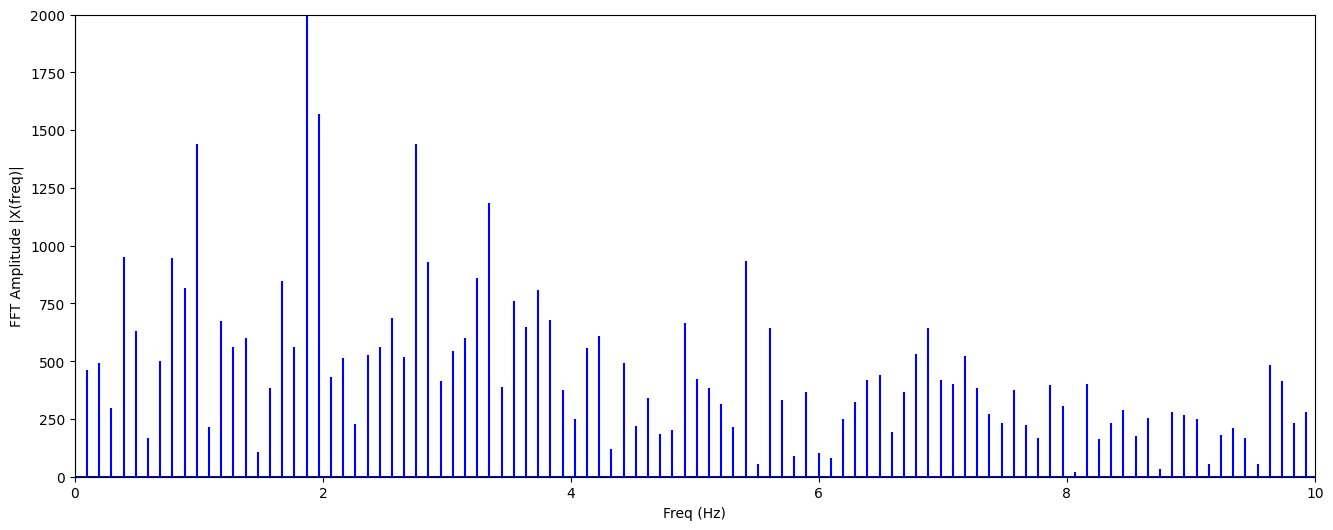

In [4]:
from numpy.fft import fft, ifft
import numpy as np

X = fft(x)
N = len(X)
n = np.arange(N)
sr=200
T = N/sr
freq = n/T 
plt.figure(figsize = (16, 6))
plt.stem(freq, np.abs(X), 'b',markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.ylim(0,2000)

## 1.3. Dimensões básicas da mesa tomada para este estudo

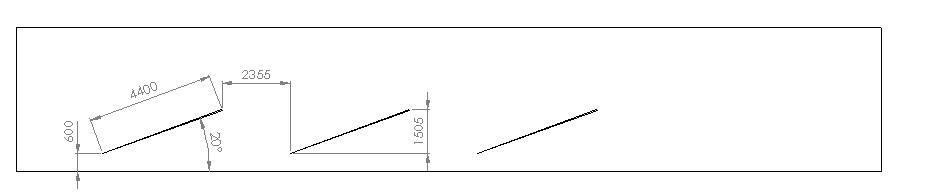

## 1.4. Velocidade crítica segundo NBR-6123

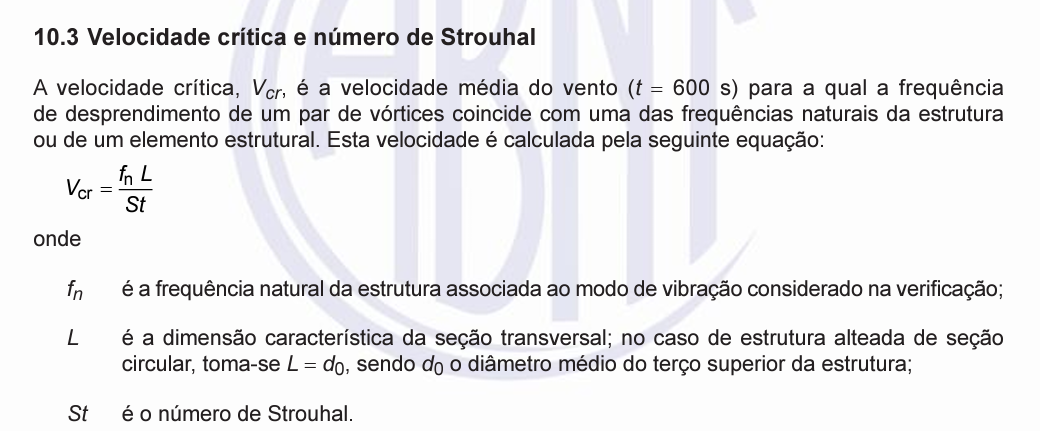

## 1.5. Análise de frequência crítica em função da amplitude

In [5]:
Vcr=35 #m/s - Velocidade crítica
ch=4.4 #m - lance da fileira de placas, segundo desenho base.
alfa=20 #graus - ângulo de inclinação da mesa.
St=0.15 #número de Strouhal
L=ch*np.sin(np.radians(alfa)) #comprimento característico.

Tomando como comprimento característico a projeção vertical da mesa e o número de Strouhal de 0.15, segundo Strobel(2014), temos como frequência mínima:

In [6]:
fn_minima=Vcr*St/L
print(f'Frequência mínima aceitavel para a estrutura fn={fn_minima:0.2f}Hz.')

Frequência mínima aceitavel para a estrutura fn=3.49Hz.


Em análise ao ítem 1.2, verifica-se que os primeiros picos de amplitude ocorrem até 4Hz, sendo o maior um pouco inferior a 2Hz, então a frequência mínima para uma mesa 2V, com 20 graus de inclinação, de 3.49Hz obtida da análise da NBR-6123 e do artigo de Strobel (2014) seria aceitável?

Somente para melhor vizualização, plota-se abaixo o gráfico da frequência de colapso de vorticidade em função da velocidade do vento para vários ângulos de inclinação da mesa em relação ao solo, considerando uma mesa de disposição 2V e as mesmas premissas do cálculo analítico anterior.

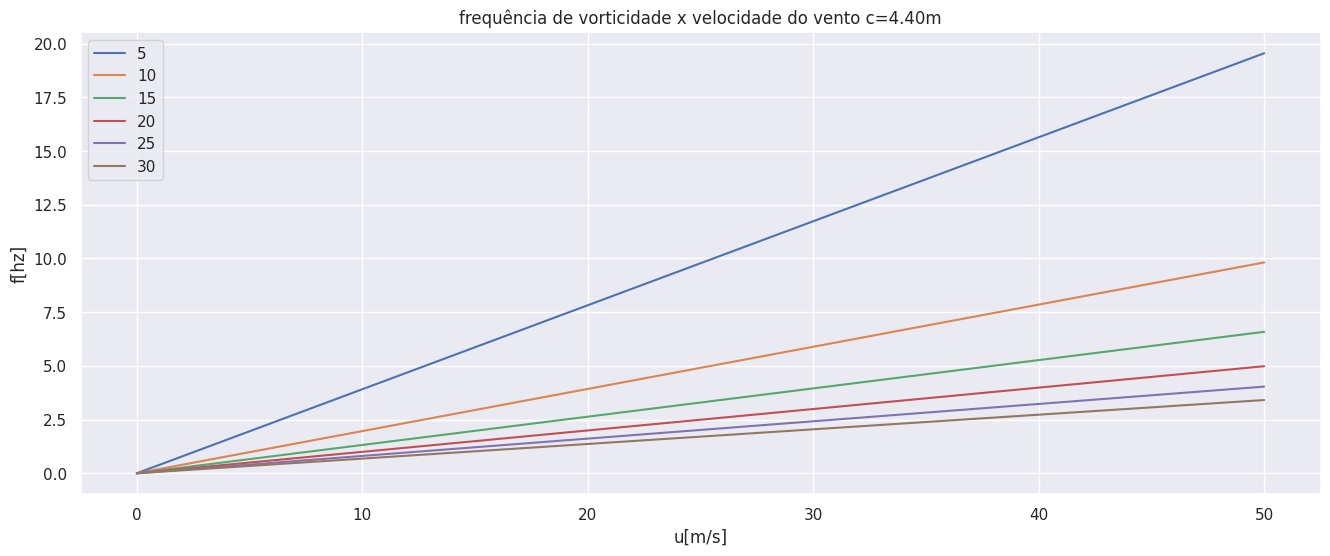

In [7]:
from pylab import *
import seaborn as sns
sns.set()
figure(figsize=(16, 6))

u=linspace(0,50,100)
c=4.4 #metros
st=0.15 #strouhal number
teta=[5,10,15,20,25,30]


for angulo in teta:
    L=c*sin(angulo*pi/180)
    f=st*u/L
    title(f"frequência de vorticidade x velocidade do vento c={c:0.2f}m")
    xlabel("u[m/s]")
    ylabel("f[hz]")
    plot(u,f, label=(angulo))
    legend()
show()

# Referências

STROBEL, K.; BANKS, D. Effects of vortex shedding in arrays of long inclined flat plates and ramifications for ground-mounted photovoltaic arrays. Journal of Wind Engineering and Industrial Aerodynamics, v. 133, p. 146–149, out. 2014.

NBR 6123: Forças devidas ao vento em edificações. Rio de Janeiro, 2023. ASSOCIAÇÃO BRASILEIRA DE NORMAS TÉCNICAS.

FFT in Python — Python Numerical Methods. Disponível em: <https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html>. Acesso em: 10 ago. 2024.